# Mall Customer Segmentation Using KMeans Clustering: A Data-Driven Approach to Understanding Consumer Behavior



## A. Introduction

This project shows how to perform a [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data) using Machine Learning algorithms. This is the unsupervised clustering problem and I will use one of the quite popular algorithms, namely KMeans.

#### Definition of the KMeans Algorithm

KMeans is a clustering algorithm that aims to group data into 𝑘 clusters based on similarities between data. This algorithm works by dividing the dataset into 𝑘 groups so that data in one cluster is more similar than data in other clusters. Clusters are represented by a centroid that is the center of the cluster.

#### How the KMeans Algorithm Works

The KMeans clustering algorithm operates by categorizing data points into clusters by using a mathematical distance measure, usually euclidean, from the cluster center. The objective is to minimize the sum of distances between data points and their assigned clusters. Data points that are nearest to a centroid are grouped together within the same category. A higher k value, or the number of clusters, signifies smaller clusters with greater detail, while a lower k value results in larger clusters with less detail.

#### Steps of the KMeans Algorithm

The working process of KMeans can be summarized in the following steps:

1. Initialization of Initial Centroids

  Choose the desired number of clusters, 𝑘. Initialize the initial centroids randomly or using a specific method like 𝑘-means++ to efficiency.

2. Assigning Data to Clusters

  Calculate the distance of each data point to the centroids using a metric like Euclidean distance:

3. Recomputing Centroids

  After all data points are grouped, calculate the new centroids for each cluster by averaging the positions of all data points in the cluster.

4. Iteration

  Repeat steps 2 and 3 until one of the following conditions is met:
  - The centroids no longer change (convergence).
  - The maximum number of iterations is reached.
  - The intra-cluster variance stops changing significantly.

5. Optimizing KMeans

  - Initialization with 𝑘-means++

    Select initial centroids intelligently to minimize initial variance, improving clustering results and reducing iterations.

  - Determining the optimal 𝑘 using Elbow Method

    Plot the number of clusters vs. intra-cluster variance. Choose 𝑘 where the variance decrease starts to slow (elbow point).

6. Clustering Evaluation

  - Silhouette Score
    
    Measure how well data is clustered by comparing distances between clusters.

  - Davies-Bouldin

    Measure clustering quality by evaluating the ratio of intra-cluster compactness to inter-cluster separation.


## B. Data Collection

#### Import Required Libraries

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")

%matplotlib inline

#### Loading Dataset

In [156]:
df = pd.read_csv('https://raw.githubusercontent.com/ferryatm/Mall-Customer-Segmentation-Data/main/Data/Mall_Customers.csv')

## C. Data Understanding

#### Display Dataset

In [157]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Get Summary Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The dataset consists of 200 rows and 5 columns. The Gender variable is a categorical type, while the other variables are numeric types.

#### Show Descriptive Statistics

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There is one binary categorical column, Gender (Male/Female). You may be tempted to one-hot encode it for the clustering. However, it is not recommended and nicely explained on the [IBM support site](https://www.ibm.com/support/pages/clustering-binary-data-k-means-should-be-avoided).

#### Missing Values Checking

In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


There are no missing data. This simplifies the analysis but it is a very unlikely scenario in a real-life where analysts spend a significant amount of time cleaning their data before the core analysis is performed.

## D. Exploratory Data Analysis (EDA)

#### Showing Gender Proportion

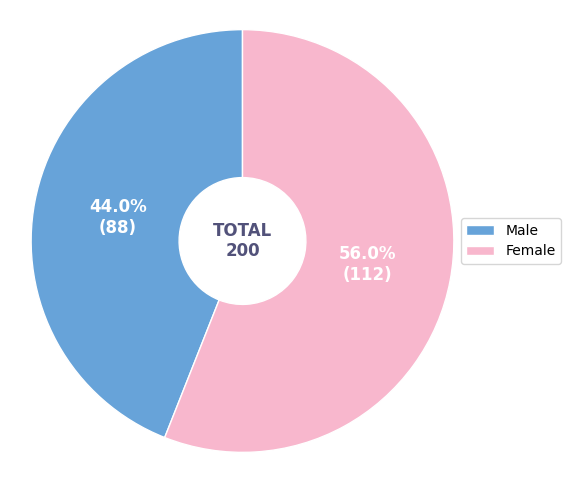

In [ ]:
males_age = df[df['Gender'] == 'Male']['Age']
females_age = df[df['Gender'] == 'Female']['Age']
sizes = [males_age.count(), females_age.count()]

def labeler(pct, allvals):
    absolute = round(pct / 100. * np.sum(allvals))
    return f"{pct:.1f}%\n({absolute})"

fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    autopct=lambda pct: labeler(pct, sizes),
    startangle=90,
    colors=['#67A3D9', '#F8B7CD'],
    textprops=dict(color="w"),
    wedgeprops=dict(width=0.7, edgecolor='w')
)

ax.legend(
    wedges, ['Male', 'Female'],
    loc='center right', bbox_to_anchor=(0.7, 0, 0.5, 1)
)

ax.text(
    0, 0, f'TOTAL\n{df["Age"].count()}',
    weight='bold', size=12, color='#52527a',
    ha='center', va='center'
)

plt.setp(autotexts, size=12, weight='bold')
ax.axis('equal')
plt.show()

When looking at the total of 200, it's clear that female make up a larger proportion of the group, accounting for 56% (112 customers), while male represent 44% (88 customers).

#### Showing Gender Distribution

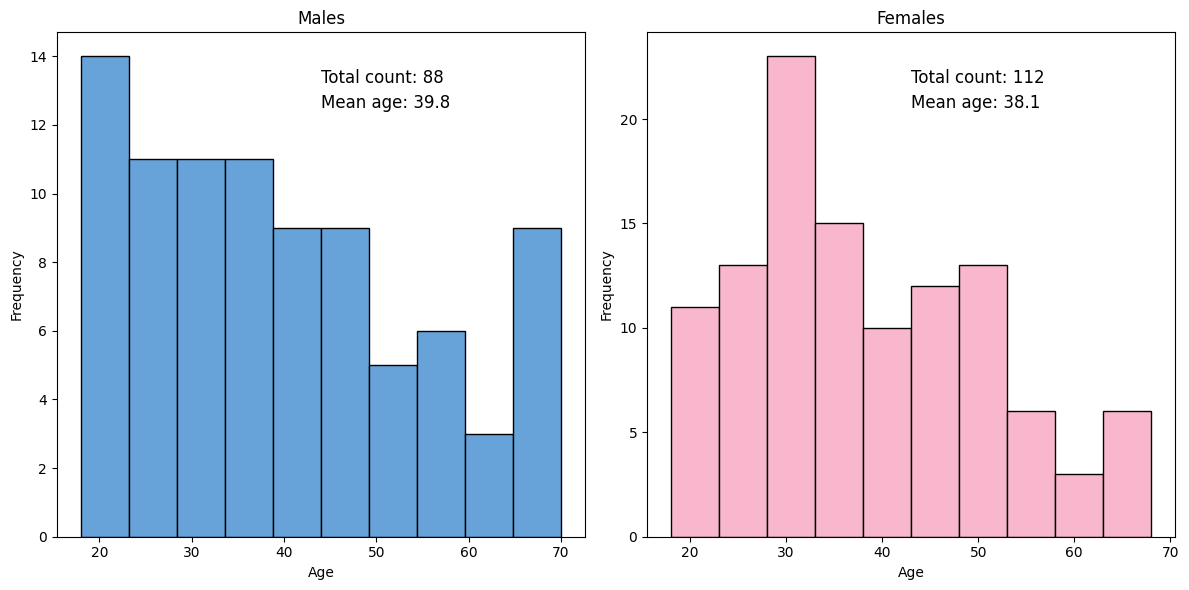

In [ ]:
plt.figure(figsize=(12, 6))

# Males histogram
plt.subplot(1, 2, 1)
plt.hist(males_age, color='#67A3D9', edgecolor='black', alpha=1)
plt.title('Males')
plt.xlabel('Age')
plt.ylabel('Frequency')

count_males = males_age.count()
mean_males = males_age.mean()
plt.text(
    0.5, 0.9, f"Total count: {count_males}",
    transform=plt.gca().transAxes, fontsize=12, color='black'
)
plt.text(
    0.5, 0.85, f"Mean age: {mean_males:.1f}",
    transform=plt.gca().transAxes, fontsize=12, color='black'
)

# Females histogram
plt.subplot(1, 2, 2)
plt.hist(females_age, color='#F8B7CD', edgecolor='black', alpha=1)
plt.title('Females')
plt.xlabel('Age')
plt.ylabel('Frequency')

count_females = females_age.count()
mean_females = females_age.mean()
plt.text(
    0.5, 0.9, f"Total count: {count_females}",
    transform=plt.gca().transAxes, fontsize=12, color='black'
)
plt.text(
    0.5, 0.85, f"Mean age: {mean_females:.1f}",
    transform=plt.gca().transAxes, fontsize=12, color='black'
)

plt.tight_layout()
plt.show()

The average age of male customers is lightly higher than female ones (39.8 vs 38.1). Distribution of male age is more uniform than females, where we can observe that the biggest age group is 30-35 years old.

#### Kolmogorov-Smirnov Test for Gender

In [ ]:
print('Kolmogorov-Smirnov test p-value: {:.2f}'.format(sp.stats.ks_2samp(males_age, females_age)[1]))

Kolmogorov-Smirnov test p-value: 0.49


The K-S test statistic ranges from 0 to 1. The results with a p-value of 0.49 showed that the age data for male and female did not show significant differences in distribution.

#### Distribution with Violin and Swarm Plots

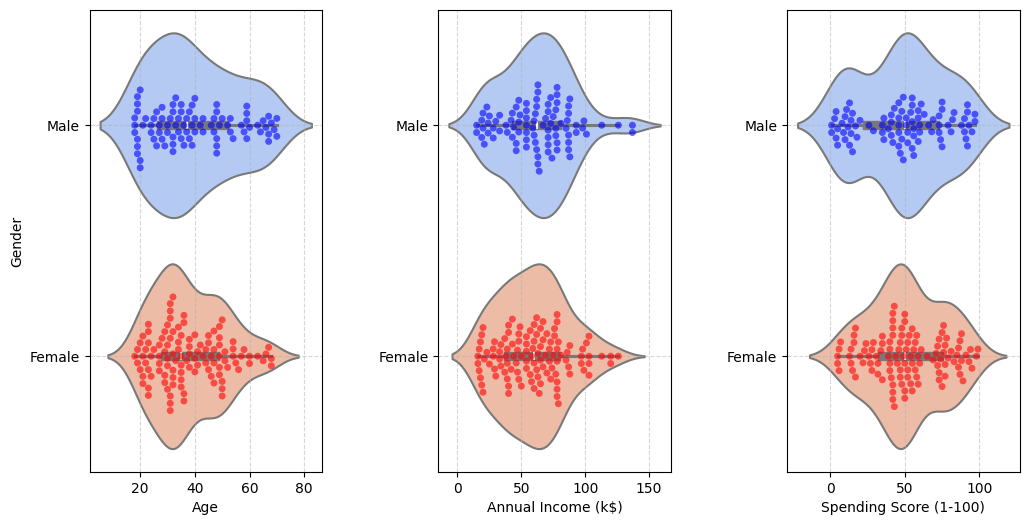

In [ ]:
plt.figure(1, figsize=(12, 6))
n = 0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)

    sns.violinplot(x=cols, y='Gender', data=df, palette=sns.color_palette("coolwarm", 2), linewidth=1.5)
    sns.swarmplot(x=cols, y='Gender', data=df, palette={'Male': 'blue', 'Female': 'red'}, size=5, alpha=0.6)

    plt.ylabel('Gender' if n == 1 else '')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


1. Age vs Gender
- The age distribution for both male and female appears to be quite similar, with the majority of the data concentrated in the age range of approximately 20-40 years.
- For male, the age distribution tends to be more uniform in the middle, with a longer tail towards older ages.
- Female exhibit a slightly more centralized distribution in the 30s age range.
2. Annual Income (k$) vs Gender
- The annual income distribution for both male and female follows a similar pattern. Income ranges from 15k to 135k.
- The majority of individuals, both male and female, have an income around 50k-75k.
- Male show a slightly wider spread compared to female in the higher income range.
3. Spending Score (1-100) vs Gender
- The score shows a more even distribution for male, while female have a more concentrated distribution in the middle (around 40-60).
- The data spread indicates that some male have very low or very high spending scores.

#### Pearson's Correlation-Enhanced Pairplot

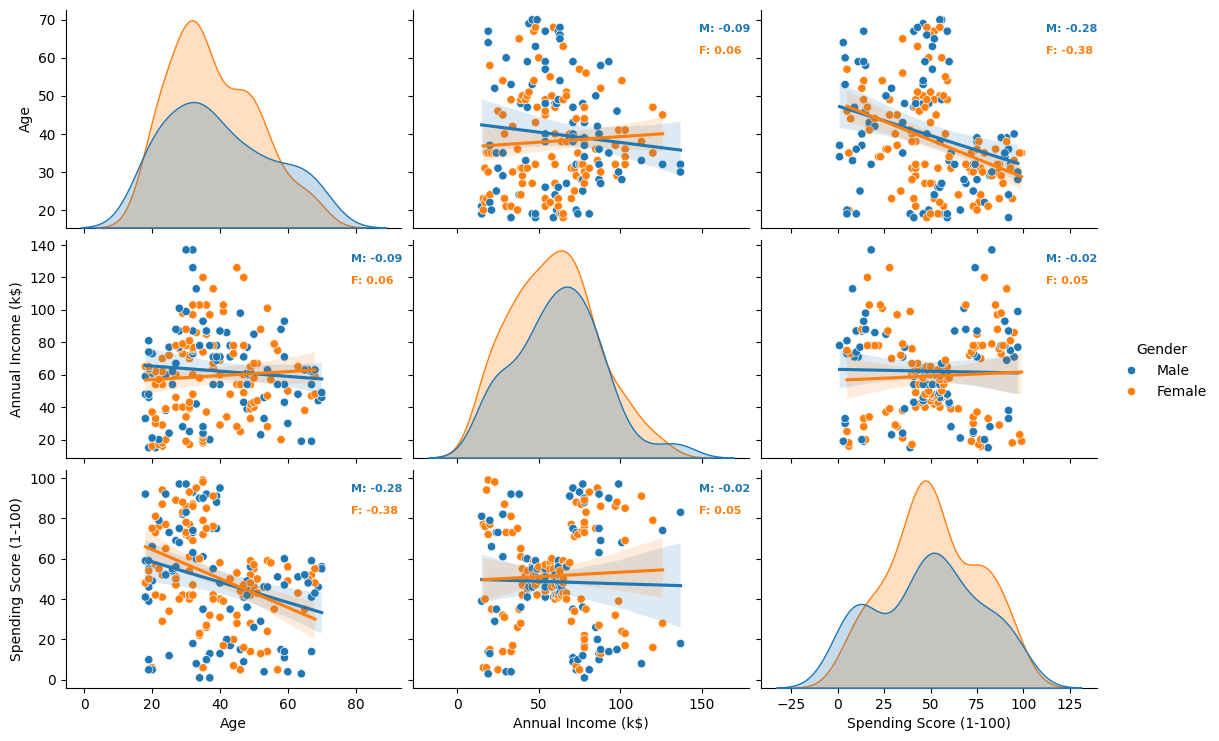

In [ ]:
X = df.drop(['CustomerID', 'Gender'], axis=1, errors='ignore')
pairplot = sns.pairplot(df.drop('CustomerID', axis=1, errors='ignore'), hue='Gender', aspect=1.5)

# Bottom-left
for i, j in zip(*np.tril_indices_from(pairplot.axes, -1)):
    ax = pairplot.axes[i, j]

    var_x = pairplot.y_vars[i]
    var_y = pairplot.x_vars[j]

    # Non-diagonal
    sns.scatterplot(data=df, x=var_y, y=var_x, hue='Gender', ax=ax,
                    palette={'Male': '#1f77b4', 'Female': '#ff7f0e'}, legend=None)

    # Regression for male
    sns.regplot(data=df[df['Gender'] == 'Male'], x=var_y, y=var_x,
                ax=ax, scatter=False, color='#1f77b4', line_kws={'label': 'Male'})

    # Regression for female
    sns.regplot(data=df[df['Gender'] == 'Female'], x=var_y, y=var_x,
                ax=ax, scatter=False, color='#ff7f0e', line_kws={'label': 'Female'})

    # Pearson correlation
    males_x = df[df['Gender'] == 'Male'][var_y]
    males_y = df[df['Gender'] == 'Male'][var_x]
    females_x = df[df['Gender'] == 'Female'][var_y]
    females_y = df[df['Gender'] == 'Female'][var_x]

    corr_male, _ = pearsonr(males_x, males_y)
    corr_female, _ = pearsonr(females_x, females_y)

    ax.text(0.85, 0.9, f"M: {corr_male:.2f}", color='#1f77b4', transform=ax.transAxes, fontsize=8, fontweight='bold')
    ax.text(0.85, 0.8, f"F: {corr_female:.2f}", color='#ff7f0e', transform=ax.transAxes, fontsize=8, fontweight='bold')

# Top-right
for i, j in zip(*np.triu_indices_from(pairplot.axes, 1)):
    ax = pairplot.axes[i, j]

    var_x = pairplot.y_vars[i]
    var_y = pairplot.x_vars[j]

    # Non-diagonal
    sns.scatterplot(data=df, x=var_y, y=var_x, hue='Gender', ax=ax,
                    palette={'Male': '#1f77b4', 'Female': '#ff7f0e'}, legend=None)

    # Regression for male
    sns.regplot(data=df[df['Gender'] == 'Male'], x=var_y, y=var_x,
                ax=ax, scatter=False, color='#1f77b4', line_kws={'label': 'Male'})

    # Regression for female
    sns.regplot(data=df[df['Gender'] == 'Female'], x=var_y, y=var_x,
                ax=ax, scatter=False, color='#ff7f0e', line_kws={'label': 'Female'})

    # Pearson correlation
    males_x = df[df['Gender'] == 'Male'][var_y]
    males_y = df[df['Gender'] == 'Male'][var_x]
    females_x = df[df['Gender'] == 'Female'][var_y]
    females_y = df[df['Gender'] == 'Female'][var_x]

    corr_male, _ = pearsonr(males_x, males_y)
    corr_female, _ = pearsonr(females_x, females_y)

    ax.text(0.85, 0.9, f"M: {corr_male:.2f}", color='#1f77b4', transform=ax.transAxes, fontsize=8, fontweight='bold')
    ax.text(0.85, 0.8, f"F: {corr_female:.2f}", color='#ff7f0e', transform=ax.transAxes, fontsize=8, fontweight='bold')

plt.show()

1.   Diagonal (Distribution for each variable)

  - Age:

      The age distribution is approximately normal (bell-shaped), but with a slight right skew. This indicates that the majority of individuals are in the young to middle-aged group (20-40 years old) with a smaller number in older age groups.

  - Annual Income (k$):
    
      The annual income distribution is nearly symmetrical, resembling a normal distribution with a slight right skew. This means that income is fairly evenly distributed, with the majority falling within the 40-80k$ range.

  - Spending Score (1-100):
    
      The spending score distribution is quite uniform without any clear pattern. This suggests that customer spending habits vary across the entire scale (low to high).

2.   Off-diagonal (Relationship between variables)

  - Age vs Annual Income (k$):
    
      The data points are scattered randomly. There is a negligible correlation between age and annual income of customers for both genders, as the correlation coefficient is close to 0.

  - Age vs Spending Score (1-100):
    
      The data distribution is quite random. There are weak negative correlations (<0.5) between age and spending score for both genders, meaning that as people get older, they tend to have lower spending scores.

  - Annual Income (k$) vs Spending Score (1-100):
    
      There seems to be a certain cluster that shows a pattern. There is a negligible correlation between annual income and spending score of customers for both genders, as the correlation coefficient is close to 0.

3. Gender

 There are no significant differences in the distribution based on gender across the three main variables. Therefore, we can disregard gender as a factor and move on to other features. Consequently, we will be using parameter X from now on.

## E. Clustering Model Development

Following the exploratory data analysis (EDA), the next step is to build a clustering model. In this case, we will be using the KMeans algorithm. The KMeans algorithm will partition the data into k clusters based on the distance between the centroids and the data points.

#### Cluster Determination Using the Elbow Method

The Elbow method is used to determine the optimal number of clusters by observing the change in the inertia value of the KMeans algorithm as the number of clusters increases. Inertia is the sum of squared distances between each data point in a cluster and the cluster center. The lower the inertia value, the better the resulting clustering algorithm. The optimal number of clusters is when the decrease in inertia begins to slow down and form an 'elbow' in the plot.

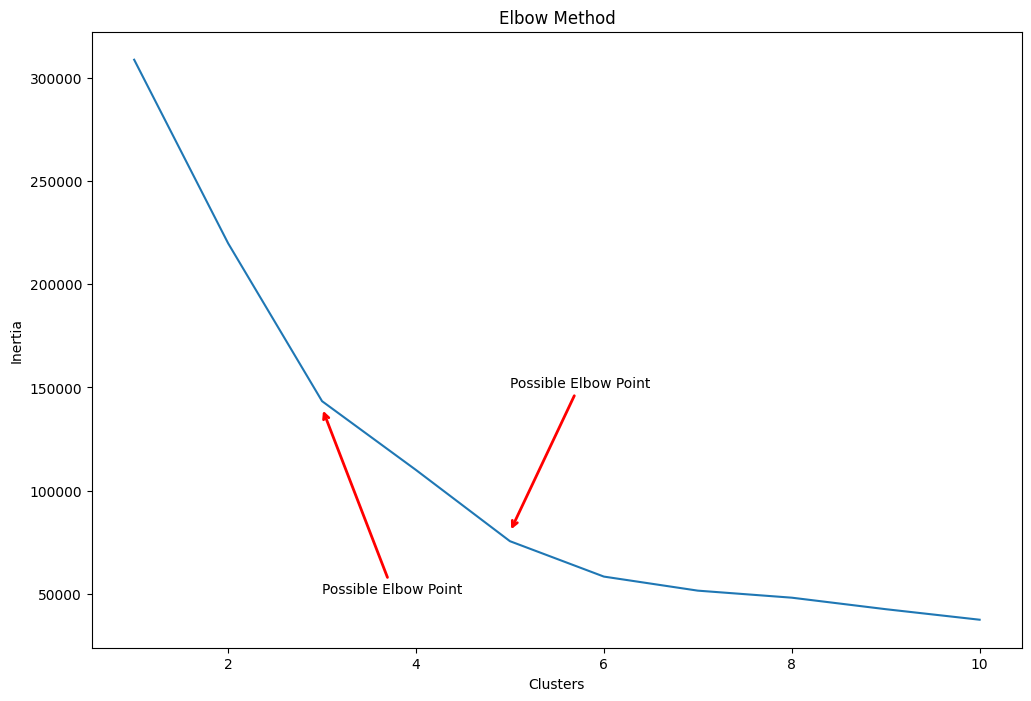

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Elbow Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

plt.show()

We can see that the elbow forms at the number of clusters 3 and 5. Let's look at both results in a graph to decide the actual number of clusters.

#### Visualizing Each Potential Clusters

###### KMeans with 3 Clusters

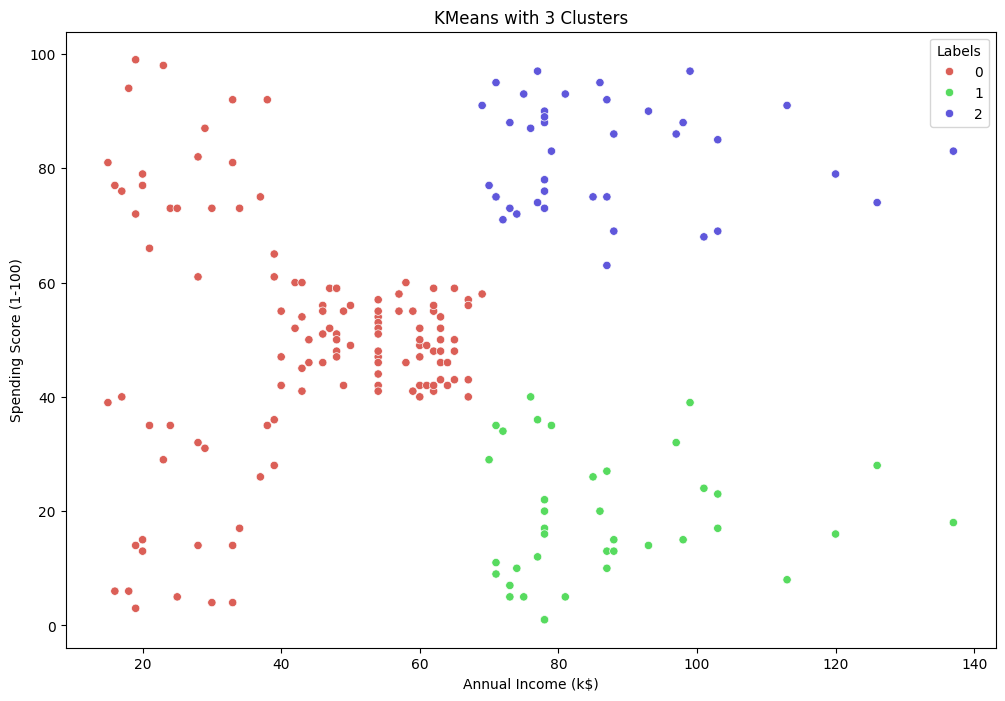

In [ ]:
# Let's try with 3 clusters first
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', data=X,
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

###### KMeans with 5 Clusters

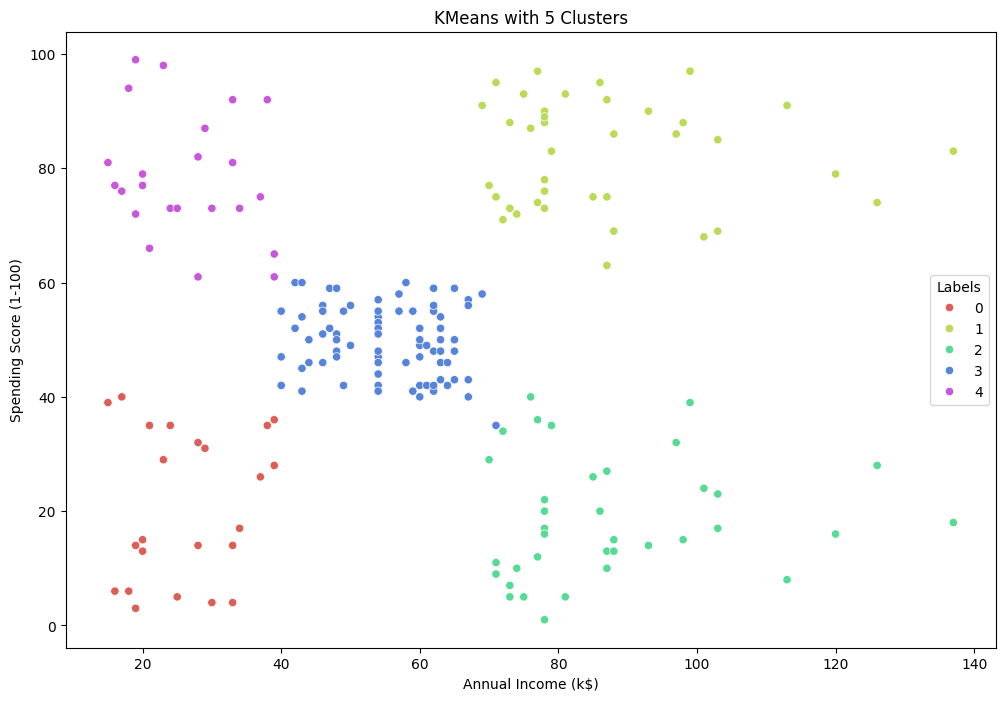

In [ ]:
# Let's see with 5 clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels', data=X,
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

Visually, it seems that 5 clusters look better than 3 clusters. Since this is an unsupervised problem, we cannot really know for sure which cluster is the best in real life. However, looking at the data, it is certain that 5 clusters will be our choice. Here are the details:
* Group one (label 0) is the group with low income and low spending.
* Group two (label 1) is the group with high income and high spending.
* Group three (label 2) is the group with high income but low spending.
* Group four (label 3) is the group with medium income and medium spending.
* Group five (label 4) is the group with low income but high spending.

Let's take a closer look with a swarmplot:


#### Swarmplot

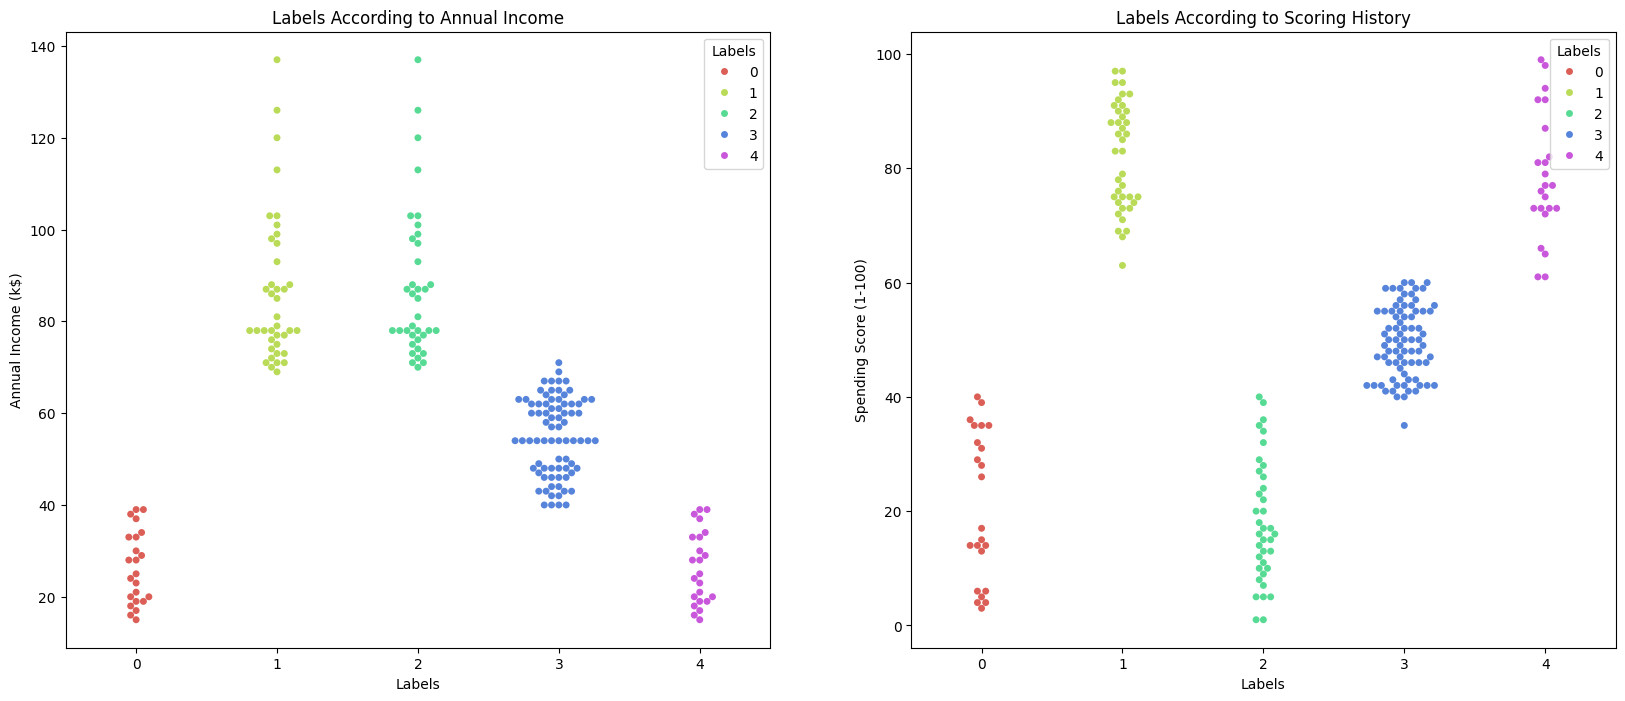

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Annual Income (k$)', hue='Labels', data=X, ax=ax, palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Spending Score (1-100)', hue='Labels', data=X, ax=ax, palette=sns.color_palette('hls', 5))
ax.set_title('Labels According to Scoring History')

plt.show()

Let's add a little addition with 3D visualization to make it more engaging:

#### 3D KMeans Clustering

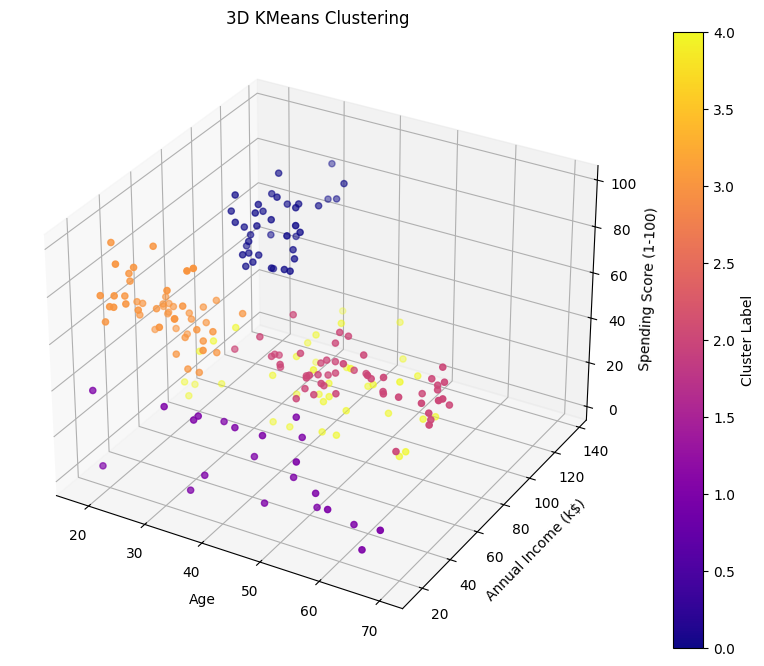

In [ ]:
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X['Age'], X['Annual Income (k$)'], X['Spending Score (1-100)'], c=X['Labels'], cmap='plasma')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster Label')

plt.title('3D KMeans Clustering')
plt.show()

## F. Clustering Model Evaluation

After we have the model and cluster predictions, we can evaluate the model by calculating several evaluation metrics such as Silhouette Score and Davies-Bouldin Index. Here are the calculations for both evaluation metrics:

#### Calculating Silhouette Score

The Silhouette score measures how well each data point fits within its assigned cluster. The closer the Silhouette score is to 1, the better the resulting clustering model. Silhouette scores can range from -1 to 1. If the Silhouette score is close to 1, it can be interpreted that the given cluster is a good fit for the existing data, and vice versa.

In [ ]:
k = 5
km = KMeans(n_clusters=k, random_state=42).fit(X)
labels = km.labels_

sil_score = silhouette_score(X, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.3575963460506624


A score of 0.36 indicates that the formed clusters have a fairly good separation, but its not perfect. This means that although most data points are in the correct cluster, there are still some points that are quite close to other clusters. In general, this indicates that the clustering model is fairly good, but there is still room for improvement, such as choosing a more appropriate number of clusters or trying another algorithm.

#### Calculating Davies-Bouldin Index

The Davies-Bouldin index measures how well the clustering model separates data into different clusters. The lower the Davies-Bouldin index, the better the resulting clustering model. The Davies-Bouldin index can range from 0 to infinity. If the Davies-Bouldin index is close to 0, it can be interpreted that the given cluster is very good at separating data into different clusters, and vice versa.

In [ ]:
db_index = davies_bouldin_score(X, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.9246692522251241


A value of 0.92 indicates that the clusters have a good separation, but it could be better separated. Typically, a Davies-Bouldin index lower than 1 is considered to be good. In this case, 0.92 indicates that although the clusters are fairly well separated, there is still a possibility to improve the separation between clusters, for example, by changing the number of clusters or using a more complex clustering method.